In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import textblob

import data

# Data Cleaning

In [2]:
# train = data.train()
# validation = data.validation()
# test = data.test()

In [3]:
data = data._data()

In [4]:
data

person                                              utter  \
conv                                                                    
0     0   person_a                              The kitchen stinks .    
      1   person_b                      I'll throw out the garbage .    
1     0   person_a  So Dick , how about getting some coffee for to...   
      1   person_b   Coffee ? I don ’ t honestly like that kind of...   
      2   person_a   Come on , you can at least try a little , bes...   
      3   person_b   What ’ s wrong with that ? Cigarette is the t...   
      4   person_a                               Not for me , Dick .    
2     0   person_a  Are things still going badly with your housegu...   
      1   person_b   Getting worse . Now he ’ s eating me out of h...   
      2   person_a   Leo , I really think you ’ re beating around ...   
      3   person_b   You ’ re right . Everything is probably going...   
3     0   person_a                  Would you mind waiting a while ?    
      1   person_b                      Well , how long will it be ?    
      2   person_a   I'm not sure . But I'll get a table ready as ...   
      3   person_b                                 OK . We'll wait .    
4     0   person_a  Are you going to the annual party ? I can give...   
      1   person_b   Thanks a lot . That's the favor I was going t...   
      2   person_a                            The pleasure is mine .    
5     0   person_a  Isn ’ t he the best instructor ? I think he ’ ...   
      1   person_b      I swear , I ’ m going to kill you for this .    
      2   person_a   What ’ s wrong ? Didn ’ t you think it was fu...   
      3   person_b   Oh , yeah ! I had a blast ! I love sweating l...   
      4   person_a   Oh , no , get off it . It wasn ’ t such a kil...   
      5   person_b                      I am wiped out . Thank you .    
      6   person_a   Look , next time get yourself some comfy shoe...   
      7   person_b           Never ! But thank you for inviting me .    
      8   person_a   Come on . You ’ ll feel better after we hit t...   
6     0   person_a  Can I take your order now or do you still want...   
      1   person_b   Well , I want a fillet steak , medium , but m...   
      2   person_a   Certainly . How about spaghetti with clams an...   
...            ...                                                ...   
13116 2   person_a         have you filled out an application form ?    
      3   person_b   yes . And I've brought some documents along w...   
      4   person_a   yes . I'll just have my assistant look over t...   
      5   person_b   yes . Does the checking account come with a d...   
      6   person_a   yes . Actually , both accounts come with card...   
      7   person_b                          that's very convenient .    
      8   person_a   it is . Our customers really like it . Do you...   
      9   person_b   yes . What's the maximum amount that you are ...   
      10  person_a                           the maximum is $ 1000 .    
      11  person_b      is there a penalty for having an overdraft ?    
      12  person_a   yes , but it's not much . You just have to pa...   
      13  person_b   that's true . Is everything alright with my d...   
      14  person_a   they're all in order . If you just sign your ...   
      15  person_b                             thank you very much .    
      16  person_a                                  you're welcome .    
13117 0   person_a   May I ask you a few questions about insurance ?    
      1   person_b                                             Yes .    
      2   person_a   Now we've given a CIF Shanghai price for some...   
      3   person_b   Well . Obviously , you won ’ t want All Risks...   
      4   person_a                                         Why not ?    
      5   person_b   Because they aren ’ t delicate goods and won ...   
      6   person_a   Then am I right in understanding that FPA doe... 

Just taking a brief look at the topic distribution. It appears that it's not even for each test set. 

In [3]:
train['topic'].unique(), validation['topic'].unique(), test['topic'].unique()

(array(['ordinary_life', 'school_life', 'culture_education',
        'attitude_emotion', 'relationship', 'tourism', 'health', 'work'],
       dtype=object),
 array(['work'], dtype=object),
 array(['work', 'politics', 'finance'], dtype=object))

Yeah the original dataset is simply sorted topics. I can't trust the topics. Not only that, they aren't really meaningful from one dataset to the next.

In [4]:
topics = pd.read_csv('data/ijcnlp_dailydialog/dialogues_topic.txt') # original unparsed
topics = topics['1']

print('Train dataset unique: {}\n'.format(topics[0:11118].unique()))
print('Validation dataset unique: {}\n'.format(topics[11118:12118].unique()))
print('Test dataset unique: {}\n'.format(topics[12118: 13118].unique()))

Train dataset unique: [1 2 3 4 5 6 7 8]

Validation dataset unique: [8]

Test dataset unique: [ 8  9 10]



##### Not going to use Topics for now. 

# Goals of Exploration
- Plot some conversation samples
- Observe and explore why 3 of the major changes in conversations happened?
    - Topics
    - Replies

In [291]:
def _clean(string):
    string = string.lower()
    return string

def word_tokenize(string):
    return string.split(' ')

def wrap_text(string, size_limit=None):
    if not size_limit:
        return string
    tokens = string.split(' ')
    new_lines = []
    last_line = [tokens[0]]
    for token in tokens[1:]:
        new_length = sum([len(i) + 1 for i in last_line]) + len(token) + 1
        if new_length > size_limit:
            new_lines.append(last_line)
            last_line = [token]
        else:
            last_line.append(token)
    new_lines.append(last_line)
    return '\n'.join([' '.join(i) for i in new_lines])

## Let's look at ten random conversations

''

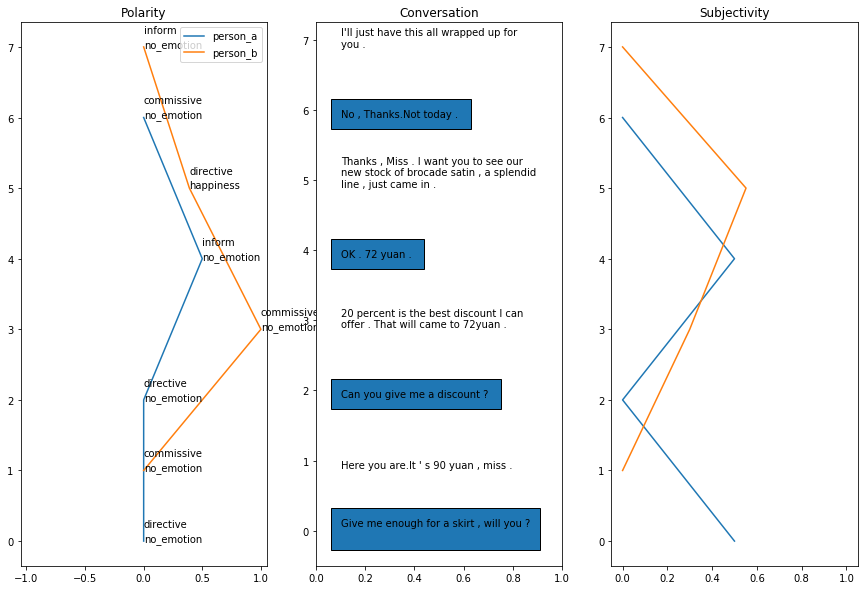

In [312]:
values = set(train.index.get_level_values(0))
num_convs = len(values)
conv_ids = np.random.randint(0, num_convs, 10)
conv_id = conv_ids[9]
one = train.loc[conv_id]

person_a = one[one['person'] == 'person_a']
person_b = one[one['person'] == 'person_b']

fig = plt.figure(figsize=(15, 10))
# polarity plot settings
ax1 = fig.add_subplot(131)
ax1.set_xlim(-1.05, 1.05)
ax1.set_yticks(range(one.shape[0]))
ax1.set_title('Polarity')
ax1.plot(person_a['polarity'], person_a.index, label='person_a')
ax1.plot(person_b['polarity'], person_b.index, label='person_b')
ax1.legend()
for i, act, emo in zip(person_a.index, person_a['act'], person_a['emo']):
    ax1.annotate(act, (person_a.loc[i]['polarity'], i + .2))
    ax1.annotate(emo, (person_a.loc[i]['polarity'], i))

for i, act, emo in zip(person_b.index, person_b['act'], person_b['emo']):
    ax1.annotate(act, (person_b.loc[i]['polarity'], i + .2))
    ax1.annotate(emo, (person_b.loc[i]['polarity'], i))

# conversation
ax2 = fig.add_subplot(132)
ax2.set_yticks(range(one.shape[0]))
ax2.set_title('Conversation')
ax2.set_ylim(-.5, one.shape[0] - .75)
for i, utter in zip(person_a.index, person_a['utter']):
    ax2.annotate(wrap_text(utter, 40), (0.1, i - .1), bbox={'pad': 10}, wrap=True, horizontalalignment='left')
for i, utter in zip(person_b.index, person_b['utter']):
    ax2.annotate(wrap_text(utter, 40), (0.1, i - .1), wrap=True, horizontalalignment='left')
#     ax2.text(0, i, utter)

# subjectivity plot settings
ax3 = fig.add_subplot(133)
ax3.set_xlim(-.05, 1.05)
ax3.set_yticks(range(one.shape[0]))
ax3.set_title('Subjectivity')

#polarity plot


# subjectivity plot
ax3.plot(person_a['subjectivity'], person_a.index)
ax3.plot(person_b['subjectivity'], person_b.index)
;

In [220]:
person_b.loc[1]['act']

'question'

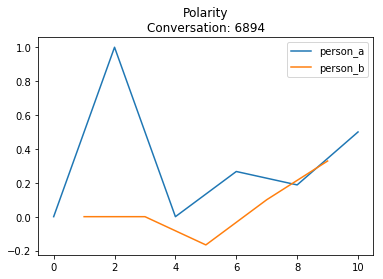

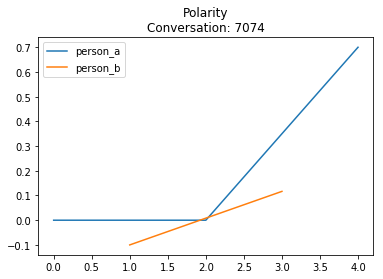

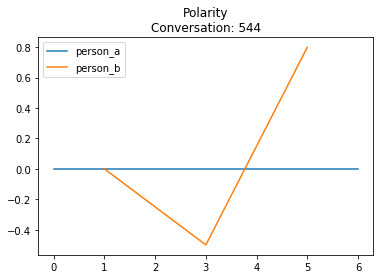

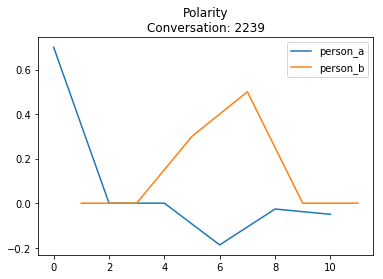

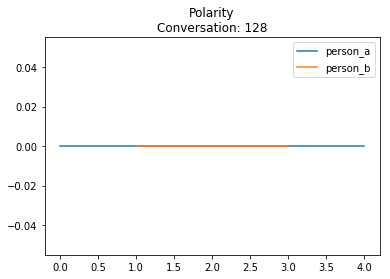

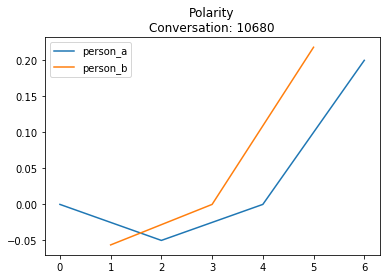

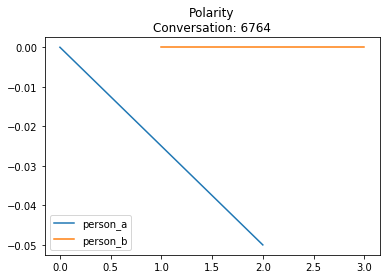

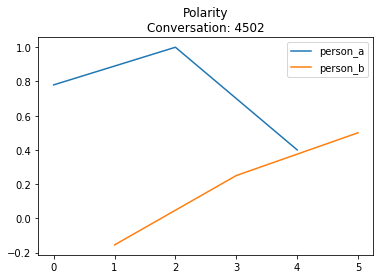

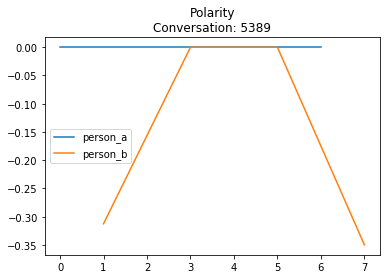

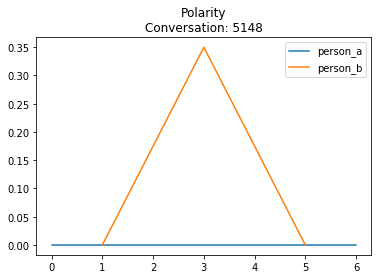

In [72]:
for conv_id in conv_ids:
    plt.figure()
    one = train.loc[conv_id]
    title='Polarity\nConversation: {}'.format(conv_id)
#     for idx, group in one.groupby('person')['polarity']:
#         group.plot(title=title, legend=True)
    one.groupby('person')['polarity'].plot(title=title, legend=True)

person
person_a    AxesSubplot(0.125,0.125;0.775x0.755)
person_b    AxesSubplot(0.125,0.125;0.775x0.755)
Name: polarity, dtype: object

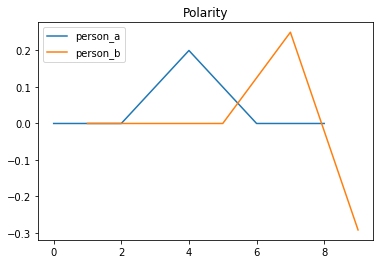

In [8]:
one

,person,utter,act,emo,polarity,subjectivity,topic
0,person_a,"Say , Jim , how about going for a few beers af...",directive,no_emotion,-0.200000,0.100000,ordinary_life
1,person_b,You know that is tempting but is really not g...,commissive,no_emotion,-0.350000,0.600000,ordinary_life
2,person_a,What do you mean ? It will help us to relax .,question,no_emotion,-0.312500,0.687500,ordinary_life
3,person_b,Do you really think so ? I don't . It will ju...,question,no_emotion,-0.100000,0.380556,ordinary_life
4,person_a,I guess you are right.But what shall we do ? ...,question,no_emotion,0.000000,0.000000,ordinary_life
5,person_b,I suggest a walk over to the gym where we can...,directive,no_emotion,0.000000,0.000000,ordinary_life
6,person_a,That's a good idea . I hear Mary and Sally of...,commissive,happiness,0.700000,0.600000,ordinary_life
7,person_b,"Sounds great to me ! If they are willing , we...",inform,happiness,0.637500,0.675000,ordinary_life
8,person_a,Good.Let ' s go now .,directive,happiness,0.000000,0.000000,ordinary_life
9,person_b,All right .,commissive,happiness,0.285714,0.535714,ordinary_life
